In [1]:
import os
import numpy as np
import pandas as pd
import csv 

FTRAIN = 'training.csv'
FTEST = 'test.csv'

def load(test=False, cols=None):
    fname = FTEST if test else FTRAIN
    df = pd.read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    #print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

x, y = load()


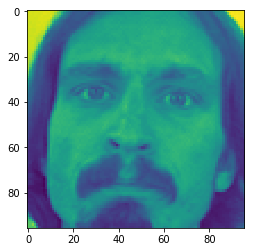

In [3]:
img = x[0].reshape(96,96)

import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

In [7]:
x_test, y_test = load(test = True)

In [9]:
print(x.shape)

(2140, 9216)


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam

Using TensorFlow backend.


In [53]:
from keras.optimizers import Adam
from keras.layers.core import Dropout

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(30, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer= 'sgd' ,metrics=['accuracy'])

In [ ]:
model2 = Sequential()
model2.add(Dense(100, activation='relu', input_shape=(x.shape[1],)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(30, activation='sigmoid'))

model2.compile(loss='mean_squared_error', optimizer= 'sgd' ,metrics=['accuracy'])

In [90]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [4]:
from keras.layers import Activation

In [131]:
"""
net2 = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('hidden4', layers.DenseLayer),
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    hidden4_num_units=500, hidden5_num_units=500,
    output_num_units=30, output_nonlinearity=None,

    update_learning_rate=0.01,
    update_momentum=0.9,

    regression=True,
    max_epochs=1000,
    verbose=1,
    )

X, y = load2d()  # load 2-d data
net2.fit(X, y)

"""
model3 = Sequential()
model3.add(Conv2D(32, (3,3), input_shape = x[0].reshape(96,96,1).shape))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (2,2)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(128, (2,2)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dense(500))
model3.add(Dense(500))
model3.add(Dense(30, activation='sigmoid'))
model3.compile(loss='mean_squared_error', optimizer= SGD(lr = 0.01, momentum = 0.9) ,metrics=['accuracy'])

In [5]:
model4 = Sequential()
model4.add(Dense(100, input_dim = x.shape[1]))
model4.add(Activation('relu'))
model4.add(Dense(30))

model4.compile(loss = 'mse', optimizer = SGD(lr = 0.01, momentum = 0.9, nesterov = True))
hist = model4.fit(x, y, epochs = 100, verbose = 1, validation_split = 0.2)

Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s - loss: 0.0516 - val_loss: 0.0189
Epoch 2/100
1712/1712 [==============================] - 1s - loss: 0.0121 - val_loss: 0.0196
Epoch 3/100
1712/1712 [==============================] - 1s - loss: 0.0100 - val_loss: 0.0175
Epoch 4/100
1712/1712 [==============================] - 1s - loss: 0.0090 - val_loss: 0.0168
Epoch 5/100
1712/1712 [==============================] - 1s - loss: 0.0086 - val_loss: 0.0167
Epoch 6/100
1712/1712 [==============================] - 1s - loss: 0.0077 - val_loss: 0.0158
Epoch 7/100
1712/1712 [==============================] - 1s - loss: 0.0071 - val_loss: 0.0163
Epoch 8/100
1712/1712 [==============================] - 1s - loss: 0.0069 - val_loss: 0.0155
Epoch 9/100
1712/1712 [==============================] - 1s - loss: 0.0065 - val_loss: 0.0157
Epoch 10/100
1712/1712 [==============================] - 1s - loss: 0.0062 - val_loss: 0.0157
Epoch 11/100

1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0089
Epoch 87/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0087
Epoch 88/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0087
Epoch 89/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0086
Epoch 90/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0086
Epoch 91/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0087ss: 0.00
Epoch 92/100
1712/1712 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0086
Epoch 93/100
1712/1712 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0084
Epoch 94/100
1712/1712 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0084
Epoch 95/100
1712/1712 [==============================] - 1s - loss: 0.0020 - val_loss: 0.0088
Epoch 96/100
1712/1712 [==============================]

In [9]:
import matplotlib.pyplot as plt

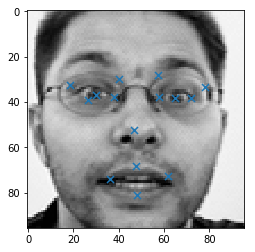

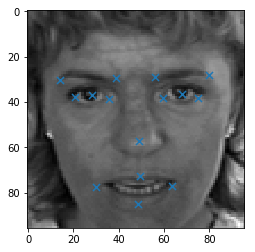

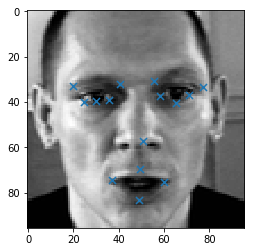

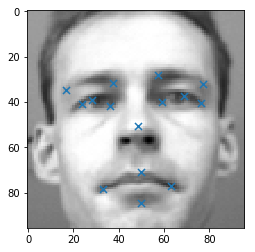

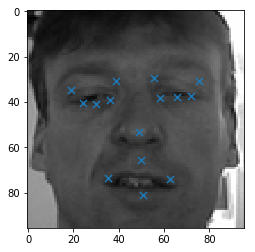

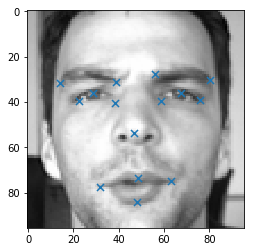

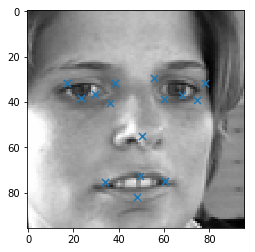

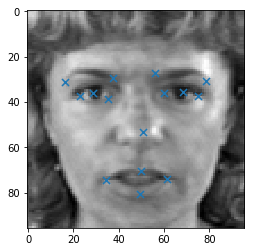

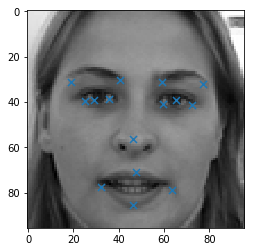

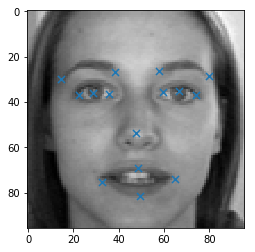

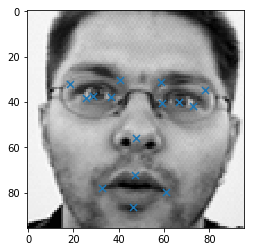

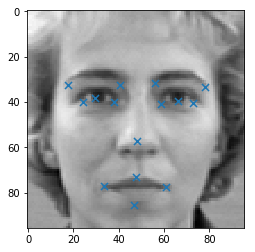

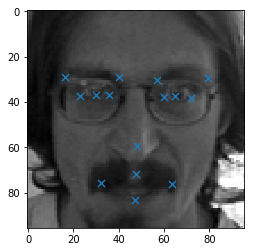

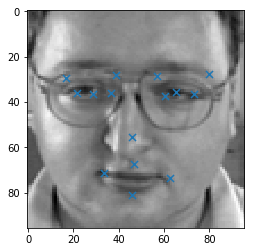

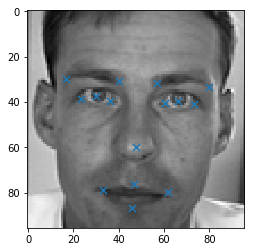

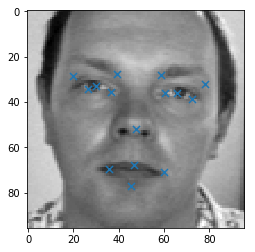

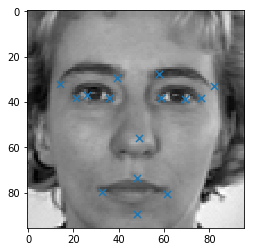

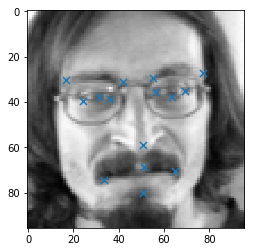

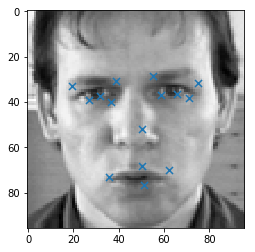

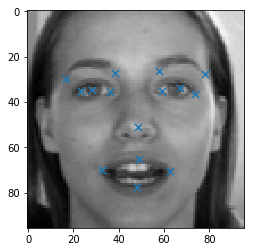

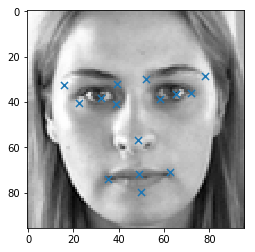

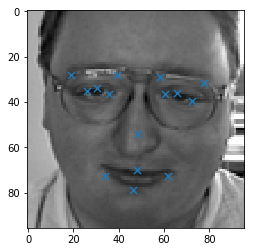

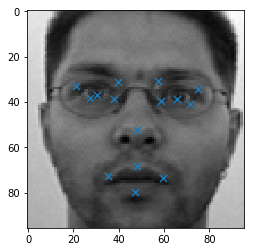

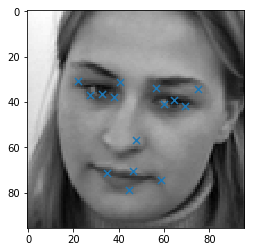

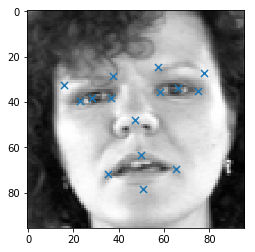

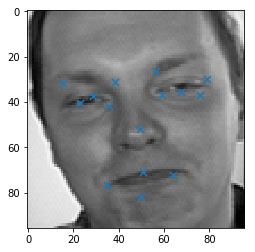

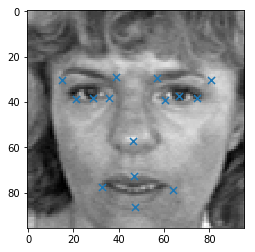

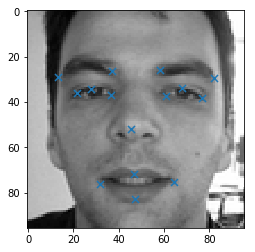

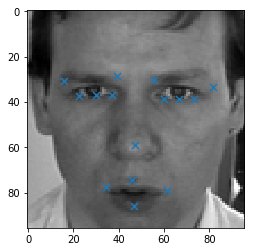

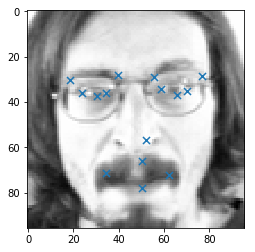

In [10]:
def plotter(x_vals, cols):
    for i in x_vals[0:cols]:
        predict = model4.predict(i.reshape(1,9216))
        x_points = predict[0][::2]
        y_points = predict[0][1::2]
        
        plt.imshow(i.reshape(96,96), cmap='gray')
        plt.scatter(x_points * 48 + 48, y_points * 48 + 48, marker='x', s=50)

        plt.show()
        

plotter(x_test, 30)